In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as datasets
from tqdm import tqdm
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
data = raw_dataset.copy()

In [3]:
data = data.dropna()
origin = data.pop('Origin')

In [4]:
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [5]:
train = data.sample(frac=0.8,random_state=0)
test = data.drop(index=train.index)

In [6]:
train_labels = train.pop('MPG')
test_labels = test.pop('MPG')

In [7]:
train_stats = train.describe()

def norm(x):
    return (x-train_stats.loc['mean'])/train_stats.loc['std']

normed_train_data, normed_test_data = norm(train_dataset), norm(test_dataset)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normed_train, normed_test = scaler.fit_transform(train), scaler.fit_transform(test)

train_db = tf.data.Dataset.from_tensor_slices((normed_train,train_labels.values)).shuffle(100).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((normed_test, test_labels.values))

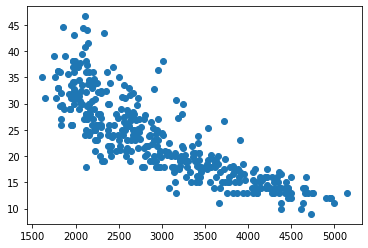

In [15]:
import matplotlib.pyplot as plt
plt.scatter(data['Weight'],data['MPG'])
plt.show()

In [16]:
train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
